# **Penyeimbangan Data**

Penyeimbangan data adalah proses mengatasi ketidakseimbangan (imbalance) pada distribusi kelas dalam dataset, khususnya pada masalah klasifikasi. Dalam dataset tidak seimbang (imbalanced dataset), jumlah sampel pada satu kelas (mayoritas) jauh lebih banyak dibanding kelas lain (minoritas). Hal ini bisa membuat model “berpihak” pada kelas mayoritas dan mengabaikan kelas minoritas.

**Tujuan**

1. Membuat distribusi kelas lebih seimbang agar model bisa belajar mengenali pola dari semua kelas dengan baik.

2. Mengurangi bias prediksi terhadap kelas mayoritas.

Metode Penyeimbangan Data

* Oversampling

    * Menambah jumlah data kelas minoritas.

    Contoh:

    1. Random Oversampling: menduplikasi data minoritas.

    2.  SMOTE (Synthetic Minority Oversampling Technique): membuat sampel sintetis baru.

    3.  ADASYN (Adaptive Synthetic Sampling): mirip SMOTE tapi lebih adaptif, membuat data sintetis lebih banyak di daerah minoritas yang sulit dipelajari.

## **Tentang Dataset Ecoli**

Dataset **Ecoli** (dari UCI Machine Learning Repository) sering digunakan untuk penelitian **klasifikasi multi-kelas**.

* **Jumlah atribut**: 7 fitur numerik (contoh: `mcg`, `gvh`, `lip`, `chg`, `aac`, `alm1`, `alm2`).
* **Target**: lokasi subseluler protein (kelas) → terdiri dari **8 kelas**.

Distribusi data tidak seimbang, misalnya:

* Kelas **`cp` (cytoplasm)** → jumlah data **paling banyak (mayoritas)**.
* Kelas lain seperti `im`, `pp`, `omL`, dsb. → jumlah data **sangat sedikit (minoritas)**.

---

## **Masalah Ketidakseimbangan Data**

* Model cenderung **mengenali kelas mayoritas (`cp`) lebih baik**, karena datanya banyak.
* Kelas minoritas seperti `pp` atau `omL` sering salah prediksi karena datanya sangat sedikit.
* Akibatnya, **akurasi keseluruhan bisa terlihat tinggi**, tapi model **gagal mengenali kelas minoritas**.

---

## **Kesimpulan**

Pada dataset **Ecoli**, penyeimbangan data penting untuk:

1. Mengurangi bias model terhadap kelas mayoritas (`cp`).
2. Meningkatkan performa model dalam mengenali kelas minoritas.
3. Membuat evaluasi model (misalnya **F1-score per kelas**) lebih representatif dibanding hanya melihat **akurasi global**.


## Instalasi Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN


1. `pandas as pd`

Digunakan untuk:

* Membaca data dari berbagai sumber (CSV, SQL, Excel, dsb).
* Mengelola data dalam bentuk **DataFrame**.
* Melakukan operasi seperti filter, group, agregasi, dan transformasi data.

---

2. `matplotlib.pyplot as plt`

Digunakan untuk membuat visualisasi data dasar, seperti:

* Scatter plot
* Bar chart
* Histogram
* Line plot

---

3. `seaborn as sns`

Digunakan untuk membuat visualisasi data yang lebih **informatif dan estetik** dibanding `matplotlib`, misalnya:

* Heatmap
* Pairplot
* Boxplot
* Distribution plot

---

4. `numpy as np`

Digunakan untuk operasi **numerik dan array**:

* Mengelola data dalam bentuk array/matriks.
* Fungsi matematika (linear algebra, statistik, random number).
* Optimasi perhitungan numerik agar lebih cepat.

---

5. `from sqlalchemy import create_engine`

Digunakan untuk:

* Membuat koneksi ke **database SQL** (misalnya MySQL, PostgreSQL).
* Mengambil data langsung dari database ke dalam pandas DataFrame.
* Menjalankan query SQL dari Python.

---

6. `from sklearn.decomposition import PCA`

Digunakan untuk:

* **Principal Component Analysis (PCA)** → teknik reduksi dimensi.
* Mengubah data berdimensi tinggi menjadi dimensi lebih rendah (biasanya 2 atau 3) untuk visualisasi.
* Menangkap variansi utama data sehingga tetap representatif meskipun dimensinya berkurang.

---

7. `from imblearn.over_sampling import ADASYN`

Digunakan untuk:

* **Adaptive Synthetic Sampling (ADASYN)** → teknik **oversampling** untuk data tidak seimbang.
* Membuat data sintetis untuk kelas minoritas berdasarkan distribusi data yang ada.
* Membantu model agar tidak bias terhadap kelas mayoritas.



## Pengumpulan Data

Data diambil dari dataset ecoli dari UCI https://archive.ics.uci.edu/dataset/39/ecoli

Data akan diletakkan di Database MySQL lokal dengan kode berikut:

In [ ]:
MYSQL_HOST = "localhost"
MYSQL_PORT = 3306
MYSQL_USER = "root"
MYSQL_PASSWORD = ""
MYSQL_DATABASE = "ecoli"

mysql_engine = create_engine(
    f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DATABASE}"
)

mysql_query = "SELECT * FROM ecoli;"
df_mysql = pd.read_sql(mysql_query, mysql_engine)

df_mysql.head()


,id,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,1,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,2,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,3,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,4,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,5,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


### Penjelasan Koneksi MySQL dan Pengambilan Data dengan Pandas

Potongan kode berikut:

```python
MYSQL_HOST = "localhost"
MYSQL_PORT = 3306
MYSQL_USER = "root"
MYSQL_PASSWORD = ""
MYSQL_DATABASE = "ecoli"

mysql_engine = create_engine(
    f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DATABASE}"
)

mysql_query = "SELECT * FROM ecoli;"
df_mysql = pd.read_sql(mysql_query, mysql_engine)

df_mysql.head()
```

#### 1. Konfigurasi Koneksi Database

```python
MYSQL_HOST = "localhost"
MYSQL_PORT = 3306
MYSQL_USER = "root"
MYSQL_PASSWORD = ""
MYSQL_DATABASE = "ecoli"
```

* `MYSQL_HOST`: alamat server database, di sini `localhost` artinya database ada di komputer sendiri.
* `MYSQL_PORT`: port default MySQL adalah `3306`.
* `MYSQL_USER`: username untuk login database (`root`).
* `MYSQL_PASSWORD`: password login database (kosong di sini).
* `MYSQL_DATABASE`: nama database yang digunakan (`ecoli`).

---

#### 2. Membuat Engine Koneksi dengan SQLAlchemy

```python
mysql_engine = create_engine(
    f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DATABASE}"
)
```

* `create_engine`: membuat **engine** untuk koneksi ke MySQL.
* Menggunakan **driver `pymysql`** sebagai penghubung antara Python dan MySQL.
* Engine ini nantinya dipakai oleh `pandas` untuk membaca data langsung dari database.

---

#### 3. Menjalankan Query SQL

```python
mysql_query = "SELECT * FROM ecoli;"
```

* Membuat query SQL untuk mengambil **semua data** dari tabel `ecoli`.

---

#### 4. Membaca Data ke DataFrame Pandas

```python
df_mysql = pd.read_sql(mysql_query, mysql_engine)
```

* `pd.read_sql`: menjalankan query SQL dan menyimpannya ke dalam **DataFrame pandas**.
* Hasilnya adalah tabel yang bisa diproses seperti data CSV/Excel, tapi sumbernya dari MySQL.

---

#### 5. Melihat 5 Data Pertama

```python
df_mysql.head()
```

* Menampilkan 5 baris pertama dari DataFrame untuk memastikan data berhasil diambil.

---


In [ ]:
fitur = ["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]

def remove_empty(data):

    hasil = []

    for kal in range(len(data)):
        a = np.array(data[kal].split(" "))
        hasil.append(a[a != ''])

    return pd.DataFrame(hasil, columns=["name", "mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2", "class"])

ecoli_df = 0

with open("ecoli.data") as file:
    a = np.array(file.read().splitlines())
    ecoli_df = remove_empty(a)

ecoli_df

,name,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.50,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.50,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.50,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.50,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.50,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.50,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.50,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.50,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.50,0.42,0.42,0.37,pp


Potongan kode berikut:

```python
fitur = ["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]

def remove_empty(data):

    hasil = []

    for kal in range(len(data)):
        a = np.array(data[kal].split(" "))
        hasil.append(a[a != ''])

    return pd.DataFrame(hasil, columns=["name", "mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2", "class"])

ecoli_df = 0

with open("ecoli.data") as file:
    a = np.array(file.read().splitlines())
    ecoli_df = remove_empty(a)

ecoli_df
```

---

1. Mendefinisikan Daftar Fitur

```python
fitur = ["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]
```

* Variabel `fitur` menyimpan nama **atribut numerik** pada dataset Ecoli.
* Ini digunakan sebagai referensi saat membentuk DataFrame nantinya.

---

2. Fungsi `remove_empty(data)`

```python
def remove_empty(data):
    hasil = []
    for kal in range(len(data)):
        a = np.array(data[kal].split(" "))
        hasil.append(a[a != ''])
    return pd.DataFrame(hasil, columns=["name", "mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2", "class"])
```

**Proses dalam fungsi:**

1. **Inisialisasi list kosong**: `hasil = []`.
2. **Loop setiap baris data** (`kal`):

   * `data[kal].split(" ")` → memisahkan baris berdasarkan spasi.
   * `a[a != '']` → menghapus string kosong akibat spasi berlebih.
3. **Menyimpan hasil** ke dalam list `hasil`.
4. **Membuat DataFrame** dengan kolom:

   * `name` → nama/ID sequence.
   * `mcg, gvh, lip, chg, aac, alm1, alm2` → fitur numerik.
   * `class` → kelas target (lokasi subseluler).

---

3. Membaca File `ecoli.data`

```python
with open("ecoli.data") as file:
    a = np.array(file.read().splitlines())
    ecoli_df = remove_empty(a)
```

* Membuka file `ecoli.data`.
* `file.read().splitlines()` → membaca semua baris dan menyimpannya ke array.
* Mengirim data ke fungsi `remove_empty()` untuk diproses menjadi DataFrame.

---

4. Hasil Akhir

```python
ecoli_df
```

* Berisi dataset Ecoli dalam format **pandas DataFrame**.
* Kolom yang tersedia:
  `["name", "mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2", "class"]`.
* Data siap digunakan untuk analisis lebih lanjut (misalnya PCA, SMOTE/ADASYN, visualisasi).



 ## Tampilkan data scatter plot menggunakan PCA.


 Berikut adalah tampilan scatter plot data ecoli sebelum terkena balancing data

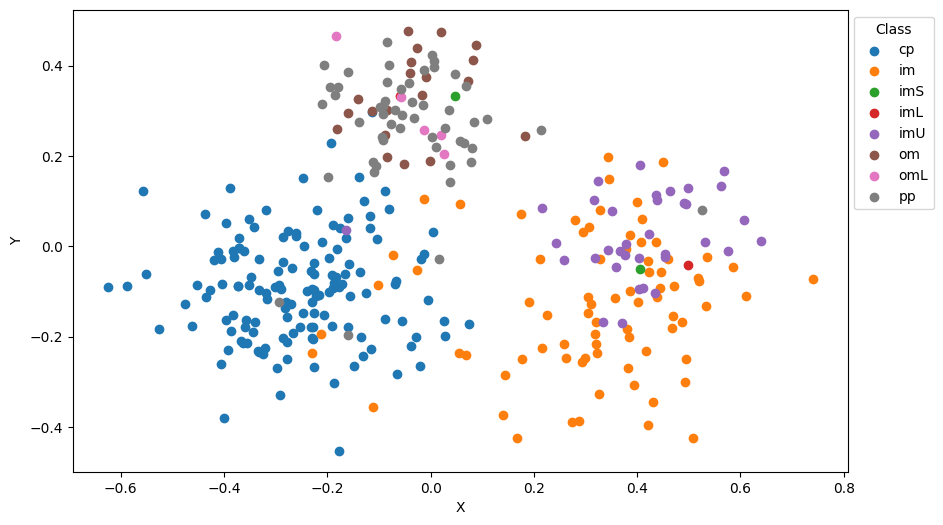

In [ ]:
pca = PCA(n_components=2)

reduced = pd.DataFrame(pca.fit_transform(ecoli_df[fitur]))

reduced = reduced.merge(ecoli_df["class"], left_index=True, right_index=True)

plt.figure(figsize=(10, 6))
for i in reduced['class'].unique():
    plt.scatter(reduced[reduced["class"] == i][0], reduced[reduced["class"] == i][1], label=i)

plt.xlabel("X")
plt.ylabel("Y")

plt.legend(title="Class", bbox_to_anchor=(1.12,1), loc="upper right")

plt.show()

Kode tersebut melakukan reduksi dimensi dengan PCA dari 7 fitur menjadi 2 dimensi, lalu hasilnya digabung dengan label kelas. Setelah itu, dibuat scatter plot 2D untuk menampilkan distribusi data, di mana setiap kelas ditandai dengan warna berbeda. Dengan cara ini, pola pemisahan antar kelas pada dataset Ecoli dapat dilihat lebih jelas dalam dua dimensi.

In [ ]:
from imblearn.over_sampling import ADASYN

X = ecoli_df[fitur]
y = ecoli_df["class"]

n_neigbors = [1, 4, 19, 34, 51, 76]

adasyn = ADASYN(n_neighbors=1, sampling_strategy="minority")
x_resampled, y_resampled = adasyn.fit_resample(X, y)

for n in n_neigbors:
    x_resampled, y_resampled = ADASYN(n_neighbors=n, sampling_strategy="minority").fit_resample(x_resampled, y_resampled)

merge = x_resampled.merge(y_resampled, left_index=True, right_index=True)

n_original = len(X)
n_total = len(x_resampled)

idx_original = range(n_original)
idx_sintetis = range(n_original, n_total)

merge

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.4,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.4,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...
1146,0.253259,0.49,0.48,0.5,0.406517,0.739663,0.443372,im
1147,0.511929,0.453141,0.48,0.5,0.569901,0.656521,0.54676,im
1148,0.629907,0.539674,0.48,0.5,0.646974,0.790047,0.807719,im
1149,0.60027,0.502247,0.995326,0.5,0.540899,0.76964,0.798742,im


Kode tersebut melakukan proses penyeimbangan data pada dataset Ecoli menggunakan ADASYN. Pertama, fitur dan label dipisahkan, kemudian dilakukan oversampling pada kelas minoritas dengan parameter jumlah tetangga (n_neighbors) yang bervariasi. Setiap iterasi menghasilkan data sintetis baru agar distribusi kelas lebih seimbang. Hasil akhirnya digabungkan kembali antara fitur dan label, dengan membedakan data asli dan data sintetis berdasarkan indeks.

## ADASYN

### Distribusi Data Setelah Oveersampling (ADASYN)

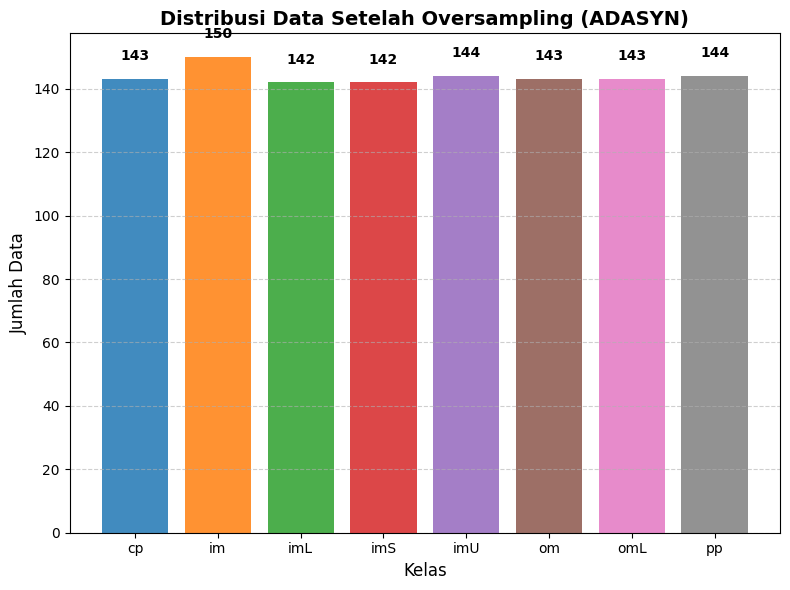

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

bar = np.array(sorted(Counter(y_resampled).items()))
kelas, dist_data = np.hsplit(bar, 2)
kelas = kelas.ravel().tolist()
dist_data = dist_data.astype(int).ravel().tolist()

plt.figure(figsize=(8,6))
bars = plt.bar(kelas, dist_data, color=plt.cm.tab10.colors[:len(kelas)], alpha=0.85)
plt.xlabel("Kelas", fontsize=12)
plt.ylabel("Jumlah Data", fontsize=12)
plt.title("Distribusi Data Setelah Oversampling (ADASYN)", fontsize=14, fontweight="bold")

for bar, val in zip(bars, dist_data):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 5,
             str(val), ha='center', va='bottom', fontsize=10, fontweight="bold")


plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Data hasil oversampling dihitung jumlahnya per kelas, lalu divisualisasikan menggunakan diagram batang berwarna berbeda untuk tiap kelas. Label jumlah data ditampilkan di atas setiap batang agar lebih informatif. Selain itu, ditambahkan grid horizontal dan tampilan diperhalus dengan pengaturan ukuran font, warna, dan layout. Dengan grafik ini, kita dapat melihat apakah distribusi data antar kelas sudah lebih seimbang setelah penerapan ADASYN.

### Visualisasi Data Setelah Oveersampling (ADASYN)

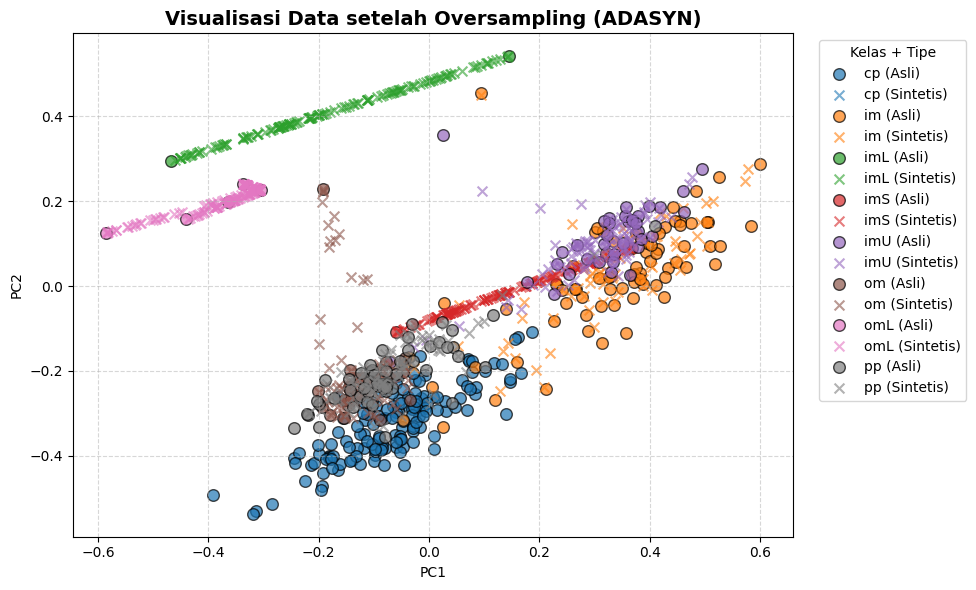

In [ ]:
n_asli = len(X)
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(x_resampled), columns=['PC1','PC2'])
pca_data['class'] = y_resampled.values
pca_data['tipe'] = 'Asli'
pca_data.loc[n_asli:, 'tipe'] = 'Sintetis'

plt.figure(figsize=(10,6))
palette = sns.color_palette("tab10", len(pca_data['class'].unique()))

for i, kelas in enumerate(sorted(pca_data['class'].unique())):
    asli = pca_data[(pca_data['class']==kelas) & (pca_data['tipe']=='Asli')]
    plt.scatter(asli['PC1'], asli['PC2'],
                c=[palette[i]], marker='o', s=70, alpha=0.7, edgecolor='k',
                label=f"{kelas} (Asli)")
    sintetis = pca_data[(pca_data['class']==kelas) & (pca_data['tipe']=='Sintetis')]
    plt.scatter(sintetis['PC1'], sintetis['PC2'],
                c=[palette[i]], marker='x', s=50, alpha=0.6,
                label=f"{kelas} (Sintetis)")

plt.title("Visualisasi Data setelah Oversampling (ADASYN)", fontsize=14, fontweight="bold")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Kelas + Tipe", bbox_to_anchor=(1.25, 1), loc="upper right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


Data asli dan data hasil sintesis dari ADASYN direduksi dimensinya menjadi dua komponen utama dengan PCA, lalu diplot dalam bentuk scatter plot. Setiap kelas digambarkan dengan warna berbeda, di mana titik lingkaran mewakili data asli dan tanda silang mewakili data sintetis. Visualisasi ini memudahkan untuk melihat bagaimana ADASYN menambahkan data baru agar distribusi antar kelas lebih seimbang.

## SMOTE

### Distribusi Data Setelah Oveersampling (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

p = ecoli_df[fitur]
q = ecoli_df["class"]

p_resampled, q_resampled = SMOTE(random_state=42, k_neighbors=1).fit_resample(X, y)

Fitur (p) dan label kelas (q) dari dataset Ecoli diambil, lalu SMOTE diterapkan untuk membuat data sintetis pada kelas minoritas. Dengan parameter k_neighbors=1, SMOTE membangkitkan data baru berdasarkan 1 tetangga terdekat. Hasilnya adalah dataset baru (p_resampled, q_resampled) dengan distribusi kelas yang lebih seimbang, sehingga lebih sesuai digunakan untuk pelatihan model klasifikasi.

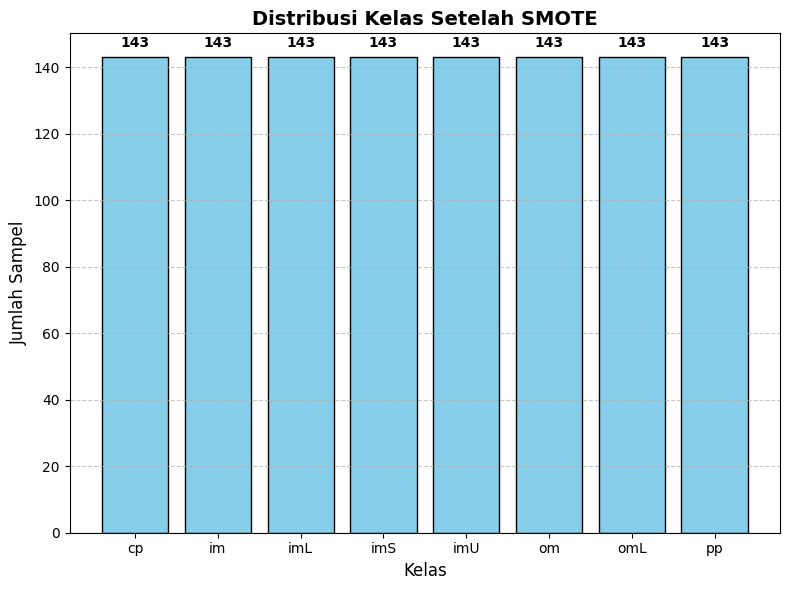

In [ ]:
bar_smote = np.array(sorted(Counter(q_resampled).items()))
kelas_smote, dist_smote = np.hsplit(bar_smote, 2)
kelas_smote = kelas_smote.ravel().tolist()
dist_smote = dist_smote.astype(int).ravel().tolist()

plt.figure(figsize=(8,6))
bars = plt.bar(kelas_smote, dist_smote, color="skyblue", edgecolor="black")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, str(yval),
             ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.title("Distribusi Kelas Setelah SMOTE", fontsize=14, fontweight="bold")
plt.xlabel("Kelas", fontsize=12)
plt.ylabel("Jumlah Sampel", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Setelah dataset diseimbangkan menggunakan SMOTE, jumlah sampel di tiap kelas dihitung menggunakan Counter. Data hasil hitungan tersebut kemudian diplot dalam bentuk bar chart dengan warna biru muda. Setiap batang diberikan label angka di atasnya untuk menunjukkan jumlah sampel per kelas. Grafik ini membantu memvisualisasikan hasil oversampling dan memastikan bahwa distribusi kelas sudah lebih seimbang.

### Visualisasi Data Seteleah Oveersampling (ADASYN)

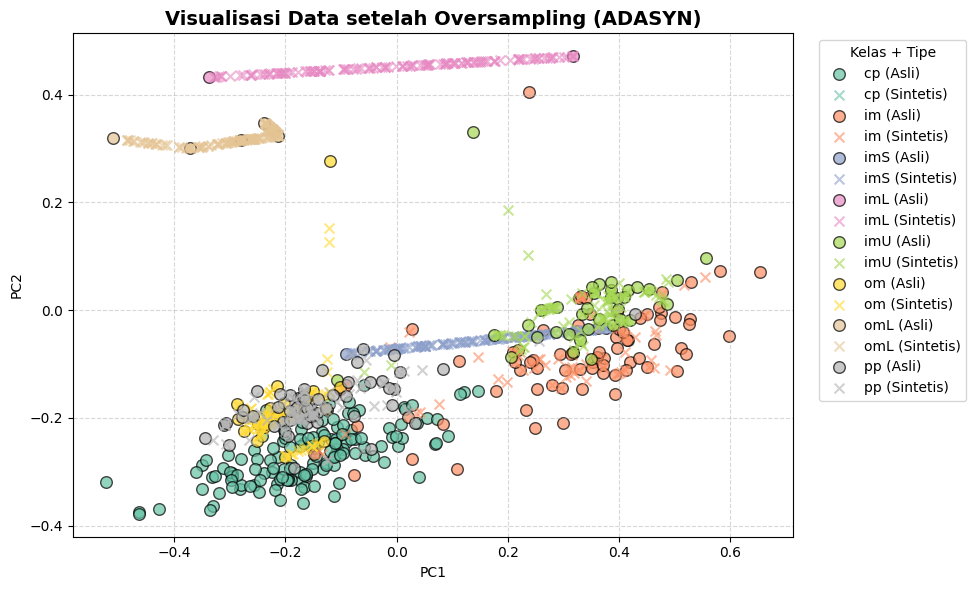

In [ ]:
n_asli = len(p)
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(p_resampled), columns=['PC1','PC2'])
pca_data['class'] = q_resampled.values
pca_data['tipe'] = 'Asli'
pca_data.loc[n_asli:, 'tipe'] = 'Sintetis'

plt.figure(figsize=(10,6))
palette = sns.color_palette("Set2", len(pca_data['class'].unique()))

for i, kelas in enumerate(pca_data['class'].unique()):
    asli = pca_data[(pca_data['class']==kelas) & (pca_data['tipe']=='Asli')]
    sintetis = pca_data[(pca_data['class']==kelas) & (pca_data['tipe']=='Sintetis')]
    plt.scatter(asli['PC1'], asli['PC2'],
                label=f"{kelas} (Asli)",
                c=[palette[i]],
                marker='o',
                s=70,
                alpha=0.7,
                edgecolor='k')
    plt.scatter(sintetis['PC1'], sintetis['PC2'],
                label=f"{kelas} (Sintetis)",
                c=[palette[i]],
                marker='x',
                s=50,
                alpha=0.6)

plt.title("Visualisasi Data setelah Oversampling (ADASYN)", fontsize=14, fontweight='bold')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Kelas + Tipe", bbox_to_anchor=(1.25, 1), loc="upper right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Pertama, data hasil oversampling ditransformasi menjadi 2 dimensi menggunakan PCA (PC1 dan PC2). Data asli dan data sintetis diberi label berbeda. Selanjutnya, data diplot dalam scatter plot:

* Data asli ditampilkan dengan marker lingkaran (o) berwarna solid.

* Data sintetis (hasil ADASYN) ditampilkan dengan marker silang (x) berwarna sama, namun lebih transparan.

Warna tiap kelas diatur dengan palet Set2 agar berbeda jelas, dan ditambahkan grid, judul, serta legenda untuk membedakan kelas beserta jenis datanya (asli/sintetis).

Hasilnya, grafik memperlihatkan bagaimana ADASYN menambahkan sampel baru untuk menyeimbangkan distribusi kelas di ruang fitur.